## Multiclass Classification

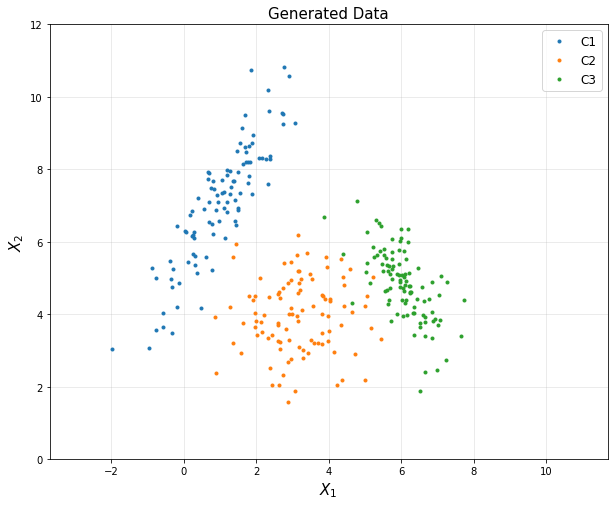

In [57]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## generate three simulated clusters
mu1 = np.array([1, 7])
mu2 = np.array([3, 4])
mu3 = np.array([6, 5])

# SIGMA1 = 0.8*np.array([[1, 0],
#                        [0, 10]])
SIGMA1 = 0.8*np.array([[1, 1.5],
                       [1.5, 3]])
SIGMA2 = 0.5*np.array([[2, 0],
                       [0, 2]])
SIGMA3 = 0.5*np.array([[1, -1],
                       [-1, 2]])

X1 = np.random.multivariate_normal(mu1, SIGMA1, 100)
X2 = np.random.multivariate_normal(mu2, SIGMA2, 100)
X3 = np.random.multivariate_normal(mu3, SIGMA3, 100)

y1 = 1*np.ones([100,1])
y2 = 2*np.ones([100,1])
y3 = 3*np.ones([100,1])

plt.figure(figsize = (10, 8))
plt.title('Generated Data', fontsize = 15)
plt.plot(X1[:,0], X1[:,1], '.', label = 'C1')
plt.plot(X2[:,0], X2[:,1], '.', label = 'C2')
plt.plot(X3[:,0], X3[:,1], '.', label = 'C3')
plt.xlabel('$X_1$', fontsize = 15)
plt.ylabel('$X_2$', fontsize = 15)
plt.legend(fontsize = 12)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.axis([-2, 10, 0, 12])
plt.show()

In [67]:
X = np.vstack([X1, X2, X3])
y = np.vstack([y1, y2, y3])

clf = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 0)
# clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)
clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

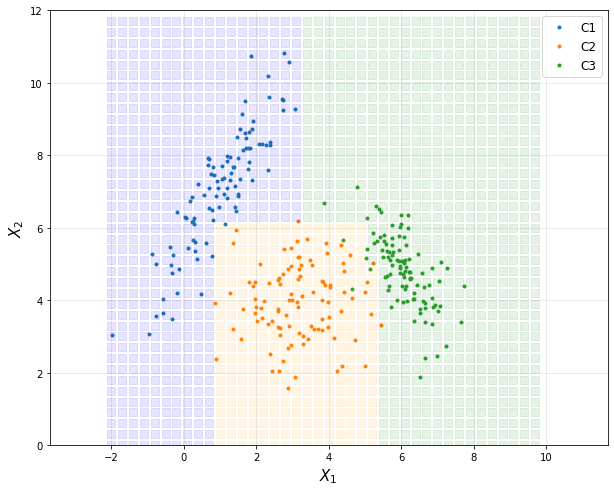

In [68]:
res = 0.3
[X1gr, X2gr] = np.meshgrid(np.arange(-2,10,res), np.arange(0,12,res))

Xp = np.hstack([X1gr.reshape(-1,1), X2gr.reshape(-1,1)])
Xp = np.asmatrix(Xp)

q = clf.predict(Xp)
q = np.asmatrix(q).reshape(-1,1)

C1 = np.where(q == 1)[0]
C2 = np.where(q == 2)[0]
C3 = np.where(q == 3)[0]

plt.figure(figsize = (10, 8))
plt.plot(X1[:,0], X1[:,1], '.', label = 'C1')
plt.plot(X2[:,0], X2[:,1], '.', label = 'C2')
plt.plot(X3[:,0], X3[:,1], '.', label = 'C3')
plt.plot(Xp[C1,0], Xp[C1,1], 's', color = 'blue', markersize = 8, alpha = 0.1)
plt.plot(Xp[C2,0], Xp[C2,1], 's', color = 'orange', markersize = 8, alpha = 0.1)
plt.plot(Xp[C3,0], Xp[C3,1], 's', color = 'green', markersize = 8, alpha = 0.1)
plt.xlabel('$X_1$', fontsize = 15)
plt.ylabel('$X_2$', fontsize = 15)
plt.legend(fontsize = 12)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.axis([-2, 10, 0, 12])
plt.show()

In [51]:
from sklearn import ensemble

clf = ensemble.RandomForestClassifier(n_estimators = 100, max_depth = 3, random_state= 0)
clf.fit(X,np.ravel(y))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [59]:
C1

array([ 560,  561,  562,  563,  564,  565,  566,  567,  568,  569,  600,
        601,  602,  603,  604,  605,  606,  607,  608,  609,  640,  641,
        642,  643,  644,  645,  646,  647,  648,  649,  680,  681,  682,
        683,  684,  685,  686,  687,  688,  689,  720,  721,  722,  723,
        724,  725,  726,  727,  728,  729,  730,  760,  761,  762,  763,
        764,  765,  766,  767,  768,  769,  770,  771,  772,  773,  800,
        801,  802,  803,  804,  805,  806,  807,  808,  809,  810,  811,
        812,  813,  814,  840,  841,  842,  843,  844,  845,  846,  847,
        848,  849,  850,  851,  852,  853,  854,  855,  880,  881,  882,
        883,  884,  885,  886,  887,  888,  889,  890,  891,  892,  893,
        894,  895,  896,  897,  898,  899,  920,  921,  922,  923,  924,
        925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
        936,  937,  938,  939,  960,  961,  962,  963,  964,  965,  966,
        967,  968,  969,  970,  971,  972,  973,  9

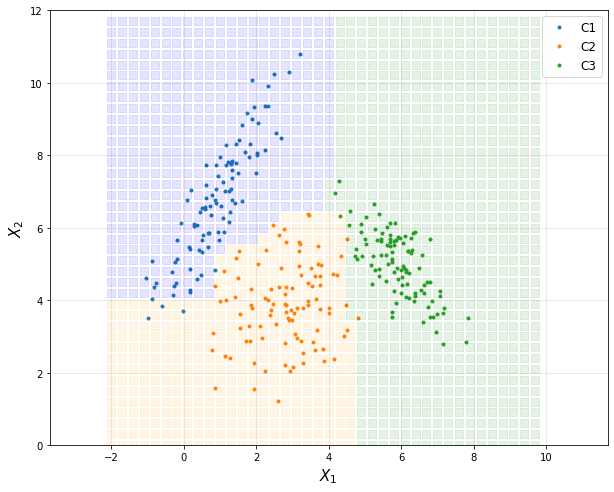

In [52]:
res = 0.3
[X1gr, X2gr] = np.meshgrid(np.arange(-2,10,res), np.arange(0,12,res))

Xp = np.hstack([X1gr.reshape(-1,1), X2gr.reshape(-1,1)])
Xp = np.asmatrix(Xp)

q = clf.predict(Xp)
q = np.asmatrix(q).reshape(-1,1)

C1 = np.where(q == 1)[0]
C2 = np.where(q == 2)[0]
C3 = np.where(q == 3)[0]

plt.figure(figsize = (10, 8))
plt.plot(X1[:,0], X1[:,1], '.', label = 'C1')
plt.plot(X2[:,0], X2[:,1], '.', label = 'C2')
plt.plot(X3[:,0], X3[:,1], '.', label = 'C3')
plt.plot(Xp[C1,0], Xp[C1,1], 's', color = 'blue', markersize = 8, alpha = 0.1)
plt.plot(Xp[C2,0], Xp[C2,1], 's', color = 'orange', markersize = 8, alpha = 0.1)
plt.plot(Xp[C3,0], Xp[C3,1], 's', color = 'green', markersize = 8, alpha = 0.1)
plt.xlabel('$X_1$', fontsize = 15)
plt.ylabel('$X_2$', fontsize = 15)
plt.legend(fontsize = 12)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.axis([-2, 10, 0, 12])
plt.show()

### Training a Decision Tree Classifier

In [2]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create decision tree classifier object
decisiontree = DecisionTreeClassifier(random_state=0)

# Train model
model = decisiontree.fit(features, target)


In [3]:
# Make new observation
# 1. sepal length in cm
# 2. sepal width in cm
# 3. petal length in cm
# 4. petal width in cm
# 5. class:
# -- Iris Setosa
# -- Iris Versicolour
# -- Iris Virginica

# observation = [[sepal length in cm, sepal width in cm, petal length in cm, petal width in cm]]
observation = [[ 2, 4, 3, 2]]

# Predict observation's class
model.predict(observation)
# 5. class:
# 0 Iris Setosa
# 1 Iris Versicolour
# 2 Iris Virginica

array([1])

In [4]:
# View predicted class probabilities for the three classes
model.predict_proba(observation)

array([[0., 1., 0.]])

In [5]:
# Create decision tree classifier object using entropy
# decisiontree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=0)
decisiontree_entropy = DecisionTreeClassifier(criterion='gini', random_state=0)

# Train model
model_entropy = decisiontree_entropy.fit(features, target)

### Training a Decision Tree Regressor

In [6]:
# Load libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets

# Load data with only two features
boston = datasets.load_boston()
features = boston.data[:,0:2]
target = boston.target

#Create decision tree classifier object
decisiontree = DecisionTreeRegressor(random_state=0)

# Train model
model = decisiontree.fit(features, target)

In [7]:
# Make new observation
observation = [[0.02, 16]]

# Predict observation's value
model.predict(observation)

array([33.])

In [8]:
# Create decision tree classifier object using entropy
decisiontree_mae = DecisionTreeRegressor(criterion="mse", random_state=0)

# Train model
model_mae = decisiontree_mae.fit(features, target)

### Visualizing a Decision Tree Model

### conda install -c conda-forge pydotplus
### conda install -c anaconda graphviz

In [9]:
# Load libraries
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image
from sklearn import tree

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create decision tree classifier object
decisiontree = DecisionTreeClassifier(random_state=0)

# Train model
model = decisiontree.fit(features, target)

# Create DOT data
dot_data = tree.export_graphviz(decisiontree,
out_file=None,
feature_names=iris.feature_names,
class_names=iris.target_names)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())


InvocationException: GraphViz's executables not found

In [11]:
# Create PDF
graph.write_pdf("iris.pdf")

# Create PNG
graph.write_png("iris.png")

True

## Training a Random Forest Classifier

In [12]:
# Load libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

# Train model
model = randomforest.fit(features, target)

In [13]:
# Make new observation
observation = [[ 5, 4, 3, 2]]
# Predict observation's class
model.predict(observation)


array([1])

In [14]:
# Create random forest classifier object using entropy
randomforest_entropy = RandomForestClassifier(criterion="entropy", random_state=0)

# Train model
model_entropy = randomforest_entropy.fit(features, target)

## Training a Random Forest Regressor

In [21]:
# Load libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets

# Load data with only two features
boston = datasets.load_boston()
features = boston.data[:,0:2]
target = boston.target

# Create random forest classifier object
randomforest = RandomForestRegressor(random_state=0, n_jobs=-1)

# Train model
model = randomforest.fit(features, target)

## Identifying Important Features in Random Forests

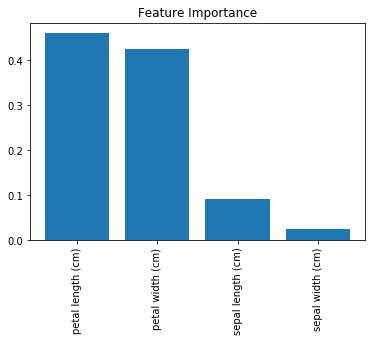

In [24]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)
# Train model
model = randomforest.fit(features, target)
# Calculate feature importances
importances = model.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [iris.feature_names[i] for i in indices]
# Create plot
plt.figure()
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(features.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(features.shape[1]), names, rotation=90)
# Show plot
plt.show()


In [25]:
# View feature importances
model.feature_importances_

array([0.09090795, 0.02453104, 0.46044474, 0.42411627])

## Selecting Important Features in Random Forests

In [26]:
# Load libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create random forest classifier
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)
# Create object that selects features with importance greater
# than or equal to a threshold
selector = SelectFromModel(randomforest, threshold=0.3)
# Feature new feature matrix using selector
features_important = selector.fit_transform(features, target)
# Train random forest using most important featres
model = randomforest.fit(features_important, target)

## Handling Imbalanced Classes

In [27]:
# Load libraries
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Make class highly imbalanced by removing first 40 observations
features = features[40:,:]
target = target[40:]

# Create target vector indicating if class 0, otherwise 1
target = np.where((target == 0), 0, 1)

# Create random forest classifier object
randomforest = RandomForestClassifier(
random_state=0, n_jobs=-1, class_weight="balanced")

# Train model
model = randomforest.fit(features, target)

## Controlling Tree Size

In [28]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create decision tree classifier object
decisiontree = DecisionTreeClassifier(random_state=0,
                                    max_depth=None,
                                    min_samples_split=2,
                                    min_samples_leaf=1,
                                    min_weight_fraction_leaf=0,
                                    max_leaf_nodes=None,
                                    min_impurity_decrease=0)

# Train model
model = decisiontree.fit(features, target)


## Improving Performance Through Boosting

In random forest, an ensemble (group) of randomized decision trees predicts the target vector. An alternative, and often more powerful, approach is called boosting. In one form of boosting called AdaBoost, we iteratively train a series of weak models (most often a shallow decision tree, sometimes called a stump), each iteration giving
higher priority to observations the previous model predicted incorrectly. 

In [30]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create adaboost tree classifier object
adaboost = AdaBoostClassifier(random_state=0)

# Train model
model = adaboost.fit(features, target)


## Evaluating Random Forests with Out-of-Bag Errors

In [31]:
# Load libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create random tree classifier object
randomforest = RandomForestClassifier(random_state=0, n_estimators=1000, oob_score=True, n_jobs=-1)

# Train model
model = randomforest.fit(features, target)

# View out-of-bag-error
randomforest.oob_score_

0.9533333333333334